In [ ]:
# import zipfile

In [ ]:
# filename = '/content/drive/MyDrive/dataset/Adversarial_NLI.zip'
# extraction_path = '/content/drive/MyDrive/dataset/Adversarial_NLI'

In [ ]:
# with zipfile.ZipFile(filename,'r') as zip:
#   zip.extractall(extraction_path)
  

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from torch import nn, optim
from torch.utils import data
import seaborn as sns
import transformers
from transformers import AutoTokenizer
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup



In [3]:
csv = pd.read_csv('/content/drive/MyDrive/dataset/IMDB_review_dataset/IMDB Dataset.csv')

In [4]:
cvs_df = pd.DataFrame(csv)

In [5]:
cvs_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
cvs_df.shape

(50000, 2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'sentiment')

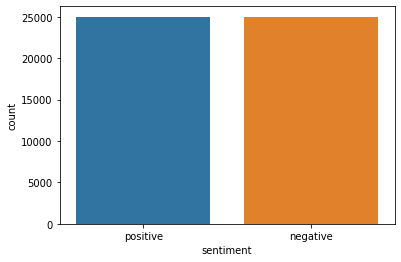

In [7]:
sns.countplot(cvs_df.sentiment)
plt.xlabel('sentiment')

In [8]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [9]:
tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [10]:
sample_text = cvs_df.iloc[2]

In [11]:
sample_text

review       I thought this was a wonderful way to spend ti...
sentiment                                             positive
Name: 2, dtype: object

In [12]:
tokens = tokenizer.tokenize(sample_text)

In [13]:
tokens

['i',
 'thought',
 'this',
 'was',
 'a',
 'wonderful',
 'way',
 'to',
 'spend',
 'time',
 'on',
 'a',
 'too',
 'hot',
 'summer',
 'weekend',
 ',',
 'sitting',
 'in',
 'the',
 'air',
 'conditioned',
 'theater',
 'and',
 'watching',
 'a',
 'light',
 '-',
 'hearted',
 'comedy',
 '.',
 'the',
 'plot',
 'is',
 'sim',
 '##pl',
 '##istic',
 ',',
 'but',
 'the',
 'dialogue',
 'is',
 'witty',
 'and',
 'the',
 'characters',
 'are',
 'li',
 '##ka',
 '##ble',
 '(',
 'even',
 'the',
 'well',
 'bread',
 'suspected',
 'serial',
 'killer',
 ')',
 '.',
 'while',
 'some',
 'may',
 'be',
 'disappointed',
 'when',
 'they',
 'realize',
 'this',
 'is',
 'not',
 'match',
 'point',
 '2',
 ':',
 'risk',
 'addiction',
 ',',
 'i',
 'thought',
 'it',
 'was',
 'proof',
 'that',
 'woody',
 'allen',
 'is',
 'still',
 'fully',
 'in',
 'control',
 'of',
 'the',
 'style',
 'many',
 'of',
 'us',
 'have',
 'grown',
 'to',
 'love',
 '.',
 '<',
 'br',
 '/',
 '>',
 '<',
 'br',
 '/',
 '>',
 'this',
 'was',
 'the',
 'most',
 

In [14]:
token_ids = tokenizer.convert_tokens_to_ids(tokens)

In [15]:
token_ids

[1045,
 2245,
 2023,
 2001,
 1037,
 6919,
 2126,
 2000,
 5247,
 2051,
 2006,
 1037,
 2205,
 2980,
 2621,
 5353,
 1010,
 3564,
 1999,
 1996,
 2250,
 22442,
 4258,
 1998,
 3666,
 1037,
 2422,
 1011,
 18627,
 4038,
 1012,
 1996,
 5436,
 2003,
 21934,
 24759,
 6553,
 1010,
 2021,
 1996,
 7982,
 2003,
 25591,
 1998,
 1996,
 3494,
 2024,
 5622,
 2912,
 3468,
 1006,
 2130,
 1996,
 2092,
 7852,
 6878,
 7642,
 6359,
 1007,
 1012,
 2096,
 2070,
 2089,
 2022,
 9364,
 2043,
 2027,
 5382,
 2023,
 2003,
 2025,
 2674,
 2391,
 1016,
 1024,
 3891,
 13449,
 1010,
 1045,
 2245,
 2009,
 2001,
 6947,
 2008,
 13703,
 5297,
 2003,
 2145,
 3929,
 1999,
 2491,
 1997,
 1996,
 2806,
 2116,
 1997,
 2149,
 2031,
 4961,
 2000,
 2293,
 1012,
 1026,
 7987,
 1013,
 1028,
 1026,
 7987,
 1013,
 1028,
 2023,
 2001,
 1996,
 2087,
 1045,
 1005,
 1040,
 4191,
 2012,
 2028,
 1997,
 13703,
 1005,
 1055,
 22092,
 1999,
 2086,
 1006,
 8108,
 1045,
 2360,
 1037,
 5476,
 1029,
 1007,
 1012,
 2096,
 1045,
 1005,
 2310,
 2196,
 204

In [16]:
len(token_ids)

220

In [17]:
len(tokens)

220

In [18]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [19]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

###tokenize vs encode_plus
tokenize and encode_plus are two different methods in the BERT tokenizer, and they serve different purposes.

The tokenize method is used to split a sentence or a piece of text into subwords or tokens. For example, in BERT, a tokenizer would split the word "playful" into the subwords ["play", "##ful"].

The encode_plus method, on the other hand, is used to both tokenize a sentence and convert the tokens into their corresponding numerical representations, called "token IDs". The method returns a dictionary that includes the following information:

**input_ids**: a list of token IDs that represent the input sequence.

**attention_mask**: a list of binary values indicating which tokens in the input sequence should be attended to by the model.

**token_type_ids**: a list of token type IDs that are used to distinguish between different sequences in the input, such as the query and the context in question answering tasks.

In summary, the tokenize method is used to perform text tokenization, while the encode_plus method is used to perform both tokenization and numerical encoding of the input text for use with the BERT model.

In [20]:
encoding = tokenizer.encode_plus(sample_text, max_length=250,
            add_special_tokens = True,
            pad_to_max_length = True,
            return_attention_mask = True,
            return_token_type_ids =False,
            return_tensors ='pt'
            )

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [21]:
encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

In [22]:
encoding['input_ids']

tensor([[  101,  1045,  2245,  2023,  2001,  1037,  6919,  2126,  2000,  5247,
          2051,  2006,  1037,  2205,  2980,  2621,  5353,  1010,  3564,  1999,
          1996,  2250, 22442,  4258,  1998,  3666,  1037,  2422,  1011, 18627,
          4038,  1012,  1996,  5436,  2003, 21934, 24759,  6553,  1010,  2021,
          1996,  7982,  2003, 25591,  1998,  1996,  3494,  2024,  5622,  2912,
          3468,  1006,  2130,  1996,  2092,  7852,  6878,  7642,  6359,  1007,
          1012,  2096,  2070,  2089,  2022,  9364,  2043,  2027,  5382,  2023,
          2003,  2025,  2674,  2391,  1016,  1024,  3891, 13449,  1010,  1045,
          2245,  2009,  2001,  6947,  2008, 13703,  5297,  2003,  2145,  3929,
          1999,  2491,  1997,  1996,  2806,  2116,  1997,  2149,  2031,  4961,
          2000,  2293,  1012,  1026,  7987,  1013,  1028,  1026,  7987,  1013,
          1028,  2023,  2001,  1996,  2087,  1045,  1005,  1040,  4191,  2012,
          2028,  1997, 13703,  1005,  1055, 22092,  

In [23]:
tokenizer.convert_ids_to_tokens(3893)

'positive'

In [24]:
tokenizer.convert_tokens_to_ids('positive')

3893

In [25]:
encoding['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [26]:
# token_len = []
# for i in cvs_df.review:
#   tokenize_rev = tokenizer.encode(i,max_length=512)
#   token_len.append(len(tokenize_rev))

In [27]:
# sns.distplot(token_len);

In [28]:
type(cvs_df)

pandas.core.frame.DataFrame

In [29]:
ss = cvs_df.iloc[1,1]

In [30]:
ss

'positive'

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


In [32]:
class IMDB_review(data.Dataset):
  def __init__(self, review, target, tokenizer, max_len):
    self.review = review
    self.encoder = LabelEncoder()
    self.target = self.encoder.fit_transform(target)
    self.tokenizer = tokenizer
    self.max_len  = max_len



  def __len__(self):
    return len(self.review)

  def __getitem__(self, idx):
    review = self.review[idx]
    target = torch.tensor(self.target[idx], dtype=torch.long)
    encoding = tokenizer.encode_plus(review, max_length=self.max_len,
            add_special_tokens = True,
            pad_to_max_length = self.max_len,
            return_attention_mask = True,
            return_token_type_ids =False,
            return_tensors ='pt'
            )
    
    return encoding['input_ids'].squeeze(),encoding['attention_mask'].squeeze(),target 






In [33]:
RANDOM_SEED = 12

In [34]:
df_train,df_test = train_test_split(cvs_df,test_size = 0.2, random_state = RANDOM_SEED)
df_val,df_test = train_test_split(df_test,test_size = 0.5, random_state = RANDOM_SEED)

In [35]:
df_train.shape,df_test.shape,df_val.shape

((40000, 2), (5000, 2), (5000, 2))

In [36]:
max_len = 512
batch_size = 16
epochs = 20
num_classes = df_train['sentiment'].unique()
num_classes = len(num_classes)
num_classes

2

In [37]:
def generate_dataloader(df, tokenizer, max_len,batch_size):
  data = IMDB_review(review = df.review.to_numpy(),
                     target = df.sentiment.to_numpy(),
                     tokenizer = tokenizer,
                     max_len=max_len)
  
  return torch.utils.data.DataLoader(data,
                         batch_size=batch_size)



In [38]:
device = 'cuda' if torch.cuda.is_available else 'cpu'
device

'cuda'

In [39]:
train_dataloader = generate_dataloader(df_train, tokenizer, max_len, batch_size)
test_dataloader = generate_dataloader(df_test, tokenizer, max_len, batch_size)
val_dataloader = generate_dataloader(df_val, tokenizer, max_len, batch_size)

In [40]:
train_dataloader.batch_size

16

The output shape of input_ids and attention_mask is (8, 1, 512), which indicates that the batch size is 8, each input has 1 sequence, and each sequence has 512 tokens. The shape of target is (8,), which indicates that the batch size is 8 and each target is a scalar value. The shape of the input and target tensors is important to keep in mind when building and training the model, as the dimensions need to match the expected inputs and outputs for the model

In [41]:
train_iterator = iter(train_dataloader)
for i in range(len(train_dataloader)):
    input_ids, attention_mask, target = next(train_iterator)
    print(input_ids[1])
    print(attention_mask[1])
    print(target[1])
    print(input_ids.shape, attention_mask.shape, target.shape)
    break


tensor([  101,  3129,  1011,  1998,  1011,  2564,  3460,  2136, 24348,  1998,
        15179,  2015,  5912,  2024,  2725, 10754,  2135,  2092,  1999,  2037,
        10922,  1010,  2021, 15179,  2015,  2038,  1037, 12219,  3291,  1012,
         2010,  6735,  3431,  2043,  2002,  1006,  4895,  2243, 19779, 15787,
         1007, 13169,  1996,  2166,  1997,  1037, 20067,  2013,  3533, 25061,
         1005,  1055, 11240,  1998,  4152,  1037,  2502,  6781,  2013,  1996,
         6080, 19000,  2370,  1012,  8295,  2010,  2689,  1997,  7280,  1006,
         1998,  1055,  2532, 28753,  2047,  4545,  1007,  1010, 15179,  2015,
         4247,  2000,  4374,  3477, 27475,  2005,  8983,  2075,  2039,  2060,
         5229,  2372,  1997,  1996,  6080,  1012,  6854,  1010,  2010, 22824,
         9144,  2272,  2000,  2422,  1999,  1037,  2610,  8118,  1010,  2029,
        17991,  1037,  5192,  2058,  2010,  2564,  1005,  1055,  2476,  2004,
         2092,  1012,  1026,  7987,  1013,  1028,  1026,  7987, 

In [42]:
encoding['input_ids'].shape
encoding['attention_mask'].shape

torch.Size([1, 250])

In [43]:
# out= model(input_ids=encoding['input_ids'],attention_mask =encoding['attention_mask'])

In [44]:
# out[1]

In [45]:
# model.config

In [46]:
name='bert-base-uncased'

In [47]:
from transformers import AutoModel

In [48]:
class BertSentimentClassifier(nn.Module):
  def __init__(self,n_classes):
    super(BertSentimentClassifier,self).__init__()
    self.model = AutoModel.from_pretrained(name)
    self.dropout = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.model.config.hidden_size,n_classes)
    self.softmax = nn.Softmax(dim=1)

  def forward(self,input_ids,attention_mask):
    output = self.model(input_ids,attention_mask)
    output=output[1]
    output = self.dropout(output)
    output = self.out(output)
    return self.softmax(output)    

In [49]:
bert_model = BertSentimentClassifier(num_classes)
bert_model = bert_model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# for i,j,k in train_dataloader:
#   i = i.to(device)
#   j=j.to(device)
#   ou = bert_model(i,j)
#   print(ou)
#   break

In [50]:

optimizer = AdamW(bert_model.parameters(),lr=2e-5, correct_bias=False)
total_steps = len(train_dataloader)*epochs
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=total_steps)
loss_fn = nn.CrossEntropyLoss().to(device)

/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
a = torch.tensor([0.88])

In [ ]:
a.float()

tensor([0.8800])

In [ ]:
from tqdm import tqdm

In [ ]:

def train_model(model,dataloader,loss_fn,optimizer,scheduler,device,n_datapoints):
  model = model.train()
  losses = []
  correct_preds = 0
  pbar = tqdm(dataloader,leave=False)
  for input,mask, label in pbar:
    input_ids = input.to(device)
    attention_mask = mask.to(device)
    labels = label.to(device)
    outputs = model(input_ids,attention_mask)
    _,preds = torch.max(outputs,dim=1)
    loss = loss_fn(outputs,labels)
    correct_preds+=torch.sum(preds==labels)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm(model.parameters(),max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
    pbar.set_description(f'Loss: {loss.item():.4f}')
  avg_loss = np.mean(losses) 
  return correct_preds/n_datapoints, avg_loss  



In [ ]:
def eval_model(model,dataloader,loss_fn,device,n_datapoints):
  model = model.eval()
  losses = []
  correct_preds = 0
  with torch.no_grad():
    pbar = tqdm(dataloader,leave=False)
    for input,mask, label in pbar:
      input_ids = input.to(device)
      attention_mask = mask.to(device)
      labels = label.to(device)
      outputs = model(input_ids,attention_mask)
      _,preds = torch.max(outputs,dim=1)
      loss = loss_fn(outputs,labels)
      correct_preds+=torch.sum(preds==labels)
      losses.append(loss.item())
      pbar.set_description(f'Loss: {loss.item():.4f}')
    avg_loss = np.mean(losses)
  return correct_preds/n_datapoints, avg_loss  


In [51]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%%time
from collections import defaultdict
directory = '/content/drive/MyDrive/dataset/IMDB_review_dataset/model_checkpoints_bert'
history = defaultdict(list)
best_accuracy = 0.00
for epoch in range(epochs):
  print(f'Epoch{epoch+1}/{epochs}')
  print('-'*10)
  train_accuracy, train_loss = train_model(bert_model,train_dataloader,loss_fn, optimizer, scheduler,device,len(df_train))
  print(f'Train_Accuracy{train_accuracy} Train_Loss{train_loss}')
  val_accuracy, val_loss = eval_model(bert_model,val_dataloader,loss_fn,device,len(df_val))
  print(f'Val_Accuracy{val_accuracy} Val_Loss{val_loss}')
  history['train_acc'].append(train_accuracy)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_accuracy)
  history['val_loss'].append(val_loss)
  if val_accuracy>best_accuracy:
    filename = 'model_epoch_{}.pth'.format(epoch)
    torch.save(bert_model.state_dict(),filename)
    best_accuracy = val_accuracy


Epoch1/20
----------


Train_Accuracy0.8836249709129333 Train_Loss0.4267204152226448


Val_Accuracy0.9165999889373779 Val_Loss0.39590349802955654
Epoch2/20
----------


Train_Accuracy0.9319999814033508 Train_Loss0.38058839834928515


Val_Accuracy0.9121999740600586 Val_Loss0.4000065722785438
Epoch3/20
----------


Loss: 0.3133:  29%|██▊       | 713/2500 [17:57<44:36,  1.50s/it]

In [52]:
model = BertSentimentClassifier(num_classes)
state_dict = torch.load('/content/drive/MyDrive/model_epoch_0.pth')

# Filter out any incompatible keys from the state_dict
state_dict = {k: v for k, v in state_dict.items() if k in model.state_dict()}

# Load the filtered state_dict into the target model
model.load_state_dict(state_dict)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


<All keys matched successfully>

In [53]:
model.eval()

BertSentimentClassifier(
  (model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [54]:
class_names = ['negative','positive']

In [55]:
def generate_sentiment(text,model,tokenizer):
  model.eval()
  encode_plus = tokenizer.encode_plus(text,
                                      max_length=max_len,
                                      add_special_tokens=True,
                                      return_token_type_ids=False,
                                      pad_to_max_length =True,
                                      return_attention_mask=True,
                                      return_tensors='pt'
                                      )
  input_ids= encode_plus['input_ids']
  attention_mask= encode_plus['attention_mask']
  output = model(input_ids,attention_mask)
  _,preds = torch.max(output,dim=1)
  return print(f'Review text: {text}\n Sentiment: {class_names[preds]} ')

In [56]:
text = """If you enjoy watching psychological thrillers with a dark vibe and alot of plot twists, this is your movie.
            First off I have to say, the acting was amazing.John Cusack always makes you forget that he's someone else off the screen when you watch his movies.
            I also love the fact that movie raises awareness about the psychological problems many people face, the bad can't be justified though,
            but it's still an interesting topic to talk about and to educate people on. The ending was a little unnecessary and I actually thought it was kinda funny,
            but it's just the way psychological horrors are... I also love how the movie isn't too long and there aren't many side plots going on (like they are usually) so you're just hooked to the story.
            Although the movie is short, they still impressively managed to keep it super suspenseful, it kept me on the edge of my seat the whole time.
            Would totally watch it again."""

In [57]:
generate_sentiment(text,model,tokenizer)

Review text: If you enjoy watching psychological thrillers with a dark vibe and alot of plot twists, this is your movie.
            First off I have to say, the acting was amazing.John Cusack always makes you forget that he's someone else off the screen when you watch his movies.
            I also love the fact that movie raises awareness about the psychological problems many people face, the bad can't be justified though,
            but it's still an interesting topic to talk about and to educate people on. The ending was a little unnecessary and I actually thought it was kinda funny,
            but it's just the way psychological horrors are... I also love how the movie isn't too long and there aren't many side plots going on (like they are usually) so you're just hooked to the story.
            Although the movie is short, they still impressively managed to keep it super suspenseful, it kept me on the edge of my seat the whole time.
            Would totally watch it again.
 Se

In [58]:
text_2 = """It is far from our place but we have been here multiple times & we always enjoy the food here. Here is my take on different parameters:
            Food: Great authentic taste for most of the dishes. They really have a good chef in the kitchen.
            Ambiance: It is well decor and looks classy inside. You will love dining here.
            Price: A little expensive compared to other competitive Indian restaurants.
            Service: We did not face any issues during our visits. Service is quick and the staff is welcoming too.
            Overall take: I would recommend this restaurant for the great taste."""

In [59]:
generate_sentiment(text_2,model,tokenizer)

Review text: It is far from our place but we have been here multiple times & we always enjoy the food here. Here is my take on different parameters:
            Food: Great authentic taste for most of the dishes. They really have a good chef in the kitchen.
            Ambiance: It is well decor and looks classy inside. You will love dining here.
            Price: A little expensive compared to other competitive Indian restaurants.
            Service: We did not face any issues during our visits. Service is quick and the staff is welcoming too.
            Overall take: I would recommend this restaurant for the great taste.
 Sentiment: positive 


In [60]:
text_3 = """Worst service ever, first they bought the wrong dish and took forever for the correct food to come,.
            The food was not that good either.also the rice was bought before the nan and waited forever for it ,
            I would never come back here again."""

In [61]:
generate_sentiment(text_3,model,tokenizer)

Review text: Worst service ever, first they bought the wrong dish and took forever for the correct food to come,.
            The food was not that good either.also the rice was bought before the nan and waited forever for it ,
            I would never come back here again.
 Sentiment: negative 


In [94]:
import torch
import torch.onnx

# Define the input shapes
input_ids = torch.zeros(1, 512, dtype=torch.long)
attention_masks = torch.zeros(1, 512, dtype=torch.long)

# Export the model to ONNX
torch.onnx.export(model, (input_ids, attention_masks), "bert.onnx", export_params=True,
                  input_names=["input_ids", "attention_masks"],
                  output_names=["output"])


In [62]:
!pip install onnxruntime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 10.6 MB/s eta 0:00:00


In [166]:
import onnxruntime as ort


In [167]:
sess = ort.InferenceSession('/content/drive/MyDrive/bert.onnx')

In [168]:
print(sess.get_inputs())

[<onnxruntime.capi.onnxruntime_pybind11_state.NodeArg object at 0x7efb141d00b0>, <onnxruntime.capi.onnxruntime_pybind11_state.NodeArg object at 0x7efb141d06b0>]


In [185]:
input_data = {'input_ids':input_ids.numpy(),
        'attention_masks':attention_masks.numpy()}

In [186]:
output = sess.run(None, input_data)

In [187]:
output

[array([[0.02835651, 0.97164345]], dtype=float32)]

In [173]:
def onnx_inference(text,onnx_model,tokenizer):
    encode_plus = tokenizer.encode_plus(text,
                                      max_length=max_len,
                                      add_special_tokens=True,
                                      return_token_type_ids=False,
                                      pad_to_max_length =True,
                                      return_attention_mask=True,
                                      return_tensors='pt'
                                      )
    input_ids = encode_plus['input_ids']
    attention_mask = encode_plus['attention_mask']
    input_data = {
        'input_ids':input_ids.numpy(),
        'attention_masks':attention_mask.numpy()
    }
    sess = ort.InferenceSession(onnx_model)
    outputs = sess.run(None,input_data)
    pred = np.argmax(outputs[0], axis=1)
    sentiment = class_names[pred[0]]
    return f'Predicted Sentiment: {sentiment}'

In [174]:
onnx_model ='/content/drive/MyDrive/bert.onnx'

In [175]:
onnx_inference(text,onnx_model,tokenizer)

'Predicted Sentiment: positive'

In [188]:
"""To use this batch size function for inference, first save the onnx model in that batch format"""
# def onnx_inference_batch(texts, onnx_model, tokenizer):
#     # Use a list comprehension to get the tokenized inputs for each text
#     tokenized_inputs = [tokenizer.encode_plus(text,
#                                               max_length=max_len,
#                                               add_special_tokens=True,
#                                               return_token_type_ids=False,
#                                               pad_to_max_length=True,
#                                               return_attention_mask=True,
#                                               return_tensors='pt') for text in texts]

#     # Get the input_ids and attention_mask tensors for each tokenized input
#     input_ids = [inputs['input_ids'] for inputs in tokenized_inputs]
#     attention_mask = [inputs['attention_mask'] for inputs in tokenized_inputs]

#     # Concatenate the input_ids and attention_mask tensors along the batch dimension (axis 0)
#     input_ids = torch.cat(input_ids, dim=0)
#     attention_mask = torch.cat(attention_mask, dim=0)

#     # Convert the PyTorch tensors to numpy arrays
#     input_ids = input_ids.numpy()
#     attention_mask = attention_mask.numpy()

#     # Create the input data dictionary
#     input_data = {
#         'input_ids': input_ids,
#         'attention_masks': attention_mask
#     }

#     # Perform inference using the ONNX Runtime session
#     sess = ort.InferenceSession(onnx_model)
#     outputs = sess.run(None, input_data)

#     # Get the predictions by finding the maximum value in the output tensors
#     preds = np.argmax(outputs[0], axis=1)

#     # Convert the predictions to class names
#     sentiments = [class_names[pred] for pred in preds]


In [189]:
# text_lst = [text,text_2,text_3] 

In [8]:
# onnx_inference_batch(text_lst,onnx_model,tokenizer)